In [3]:
import numpy as np
import matplotlib.pyplot as plt
#bola a ser chutada com angulo em relacao a horizontal

#a


g = 9.8

# Convert velocity from km/h to m/s
vNorm = 100 * (1000 / 3600)
# Convert angle from degrees to radians
angle = 10 / 180 * np.pi

vXinitial = np.cos(angle) * vNorm
vYinitial = np.sin(angle) * vNorm

# Parâmetros
dt = 0.01
t0 = 0
tf = 1.2
# Agrupamos os valores de x e y em arrays para representar as quantidades
x0 = np.array([0, 0])
v0 = np.array([vXinitial, vYinitial])

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# O tamanho dos arrays para ser criados, como este tuple tem dois valores
# um array com `n + 1` de arrays bidimensionais
shape = (n + 1, 2)

# O tempo continua a ser unidimensional
t = np.zeros(n + 1)
# Todas as outras quantidades passam a 2D
x = np.zeros(shape)
v = np.zeros(shape)
a = np.zeros(shape)

# Insert initial values
a[0] = np.array([0, -g])
v[0] = v0
t[0] = t0
x[0] = x0

# O metódo de euler é feito como normal
for i in range(n):
    a[i + 1] = np.array([0, -g])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

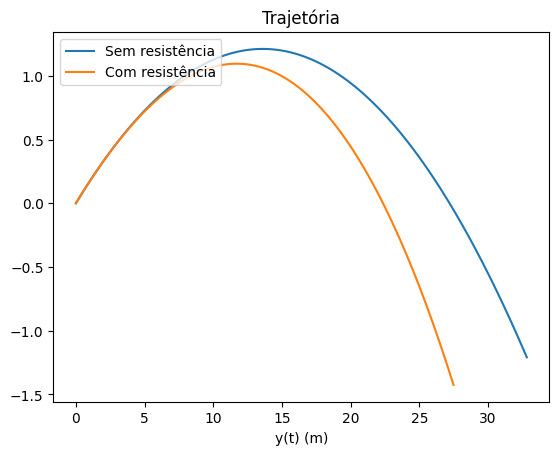

In [4]:
#b

# Valores oferecidos
vT = 100 * (1000 / 3600)
D = g / vT**2

tRes = np.zeros(n + 1)
xRes = np.zeros(shape)
vRes = np.zeros(shape)
aRes = np.zeros(shape)

# Insert initial values
aRes[0] = np.array([0, -g])
vRes[0] = v0
tRes[0] = t0
xRes[0] = x0

for i in range(n):
    vNorm = np.linalg.norm(vRes[i])
    # Cálculo da aceleração da resistência do ar
    aXRes = -D * vNorm * vRes[i][0]
    aYRes = -D * vNorm * vRes[i][1]
    
    aRes[i + 1] = np.array([aXRes, -g + aYRes])
    vRes[i + 1] = vRes[i] + aRes[i] * dt
    xRes[i + 1] = xRes[i] + vRes[i] * dt
    tRes[i + 1] = tRes[i] + dt

# Utilizamos a notação [:, i] para extrair o primeiro elemento de todos
# os vetores num array.
plt.plot(x[:, 0], x[:, 1], label = "Sem resistência")
plt.plot(xRes[:, 0], xRes[:, 1], label = "Com resistência")
plt.xlabel("x(t) (m)")
plt.xlabel("y(t) (m)")
plt.legend(loc="upper left")
plt.title("Trajetória")
plt.show()

In [6]:
#c

idx = xRes[:, 1].argmax()
yMax = xRes[idx, 1]
tMax = t[idx]
print(yMax)
print(tMax)

1.0953235842486169
0.46000000000000024


In [7]:
#d

for i in range(n):
    if xRes[i, 1] * xRes[i + 1, 1] < 0:
        idx = i
        break

xRange = xRes[idx, 0]
tRange = t[idx]

print(xRange)
print(tRange)

22.309392500440893
0.9400000000000006
